In [1]:
import numpy as np
import librosa
import scipy
from scipy.io import wavfile
import os, time, csv, datetime
from librosa import display
import matplotlib.pyplot as plt 
from numpy import diff
#import pyworld as pw
import h5py

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [31]:
parent_dir = os.getcwd()
dataset_dir = os.path.join(parent_dir,'New folder - Copy')
dataset_rec = os.path.join(parent_dir,'RAVDESS - Copy')
print(dataset_dir, dataset_rec)

C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy


In [32]:
length_wave_max = 85346 #maximum length of the audio waves
 
emo_label ={0: 'neutral', 1:'calm', 2: 'happy',
            3: 'sad',   4: 'angry', 5: 'fearful',
            6: 'disgust', 7: 'surprise'}

features = []
labels  = []
max_frame_len = 442 #maximum length of the audio waves
emotionset = [0,1, 2, 3, 4, 5, 6, 7]


In [33]:
#Preparing training set from RAVDESS

totalem = range(len(emotionset))
tr_wave = []
tr_lab = []
# val_wave = []
# val_lab = []
# test_wave = []
# test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_dir = os.path.join(dataset_dir, str(emotion))
    print(emotion_dir)
    
    file_list = os.listdir(emotion_dir)
    sett = range(len(file_list))
    
    for filenum in sett:
        
        #Load the dataset 
        y, sr = librosa.load(os.path.join(emotion_dir, file_list[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y = y[:length_wave_max]
        if len(y) < length_wave_max:
            y = np.concatenate([y, np.zeros(length_wave_max-len(y))])
            
        _waveform.append(y)
        _labels.append(emotion)
        
        waveform = np.array(_waveform)
        labels = np.array(_labels)
    
    X_train = waveform
    y_train = labels
    #X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    print('Train',X_train.shape)
    tr_wave.append(X_train)
    tr_lab.append(y_train)
    
#     print('Val',X_val.shape)
#     val_wave.append(X_val)
#     val_lab.append(y_val)
    
    #print('Test',X_test.shape)
    #test_wave.append(X_test)
    #test_lab.append(y_test)


0
Reading emotion #0 :neutral...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\0
Train (400, 85346)
1
Reading emotion #1 :calm...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\1
Train (400, 85346)
2
Reading emotion #2 :happy...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\2
Train (400, 85346)
3
Reading emotion #3 :sad...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\3
Train (400, 85346)
4
Reading emotion #4 :angry...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\4
Train (400, 85346)
5
Reading emotion #5 :fearful...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\5
Train (400, 85346)
6
Reading emotion #6 :disgust...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\6
Train (400, 85346)
7
Reading emotion #7 :surprise...
C:\Users\kapil\Desktop\Semester 2\SRU\New folder - Copy\7
Train (400, 85346)


In [34]:
#Preparing test set from recorded files

totalem = range(len(emotionset))
#tr_wave = []
#tr_lab = []
#val_wave = []
#val_lab = []
test_wave = []
test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_rec = os.path.join(dataset_rec, str(emotion))
    print(emotion_rec)
    
    file_list1 = os.listdir(emotion_rec)
   # file_list1=file_list1[0:100]
    sett1 = range(len(file_list1))
    ind=0
    for filenum in sett1:
        #Load the dataset 
        y1, sr = librosa.load(os.path.join(emotion_rec, file_list1[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y1 = y1[:length_wave_max]
        if len(y1) < length_wave_max:
            y1 = np.concatenate([y1, np.zeros(length_wave_max-len(y1))])
            
        _waveform.append(y1)
        _labels.append(emotion)
        
        waveform1 = np.array(_waveform)
        labels1 = np.array(_labels)
    
    X_test = waveform1
    y_test = labels1
    #X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    #print('Train',X_train.shape)
    #tr_wave.append(X_train)
    #tr_lab.append(y_train)
    
#     print('Val',X_val.shape)
#     val_wave.append(X_val)
#     val_lab.append(y_val)
    
    print('Test',X_test.shape)
    test_wave.append(X_test)
    test_lab.append(y_test)


0
Reading emotion #0 :neutral...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\0
Test (100, 85346)
1
Reading emotion #1 :calm...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\1
Test (100, 85346)
2
Reading emotion #2 :happy...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\2
Test (100, 85346)
3
Reading emotion #3 :sad...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\3
Test (100, 85346)
4
Reading emotion #4 :angry...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\4
Test (100, 85346)
5
Reading emotion #5 :fearful...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\5
Test (100, 85346)
6
Reading emotion #6 :disgust...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\6
Test (100, 85346)
7
Reading emotion #7 :surprise...
C:\Users\kapil\Desktop\Semester 2\SRU\RAVDESS - Copy\7
Test (100, 85346)


In [35]:
from subprocess import call
r=call('ffmpeg -i "test.mp3" -acodec pcm_u8 -ar 22050 "test.wav"',shell=True)

In [36]:
tr_w = np.array(tr_wave); tr_w = np.vstack((tr_w[0], tr_w[1], tr_w[2], tr_w[3], tr_w[4], tr_w[5], tr_w[6], tr_w[7] ))
tr_l = np.array(tr_lab);  tr_l = np.hstack((tr_l[0], tr_l[1], tr_l[2], tr_l[3], tr_l[4], tr_l[5], tr_l[6], tr_l[7] )) 
print('Total Training set',tr_w.shape) 


test_w = np.array(test_wave); test_w = np.vstack((test_w[0], test_w[1], test_w[2], test_w[3], test_w[4], test_w[5], test_w[6], test_w[7] ))
test_l = np.array(test_lab);  test_l = np.hstack((test_l[0], test_l[1], test_l[2], test_l[3], test_l[4], test_l[5], test_l[6], test_l[7] )) 
print('Total Test set',test_w.shape) 

#plt.figure(1, figsize=(8,2))
#plt.subplot(121); plt.plot(tr_w[334,:])
#plt.subplot(122); plt.plot(test_w[100,:])
#plt.tight_layout()

Total Training set (3200, 85346)
Total Test set (800, 85346)


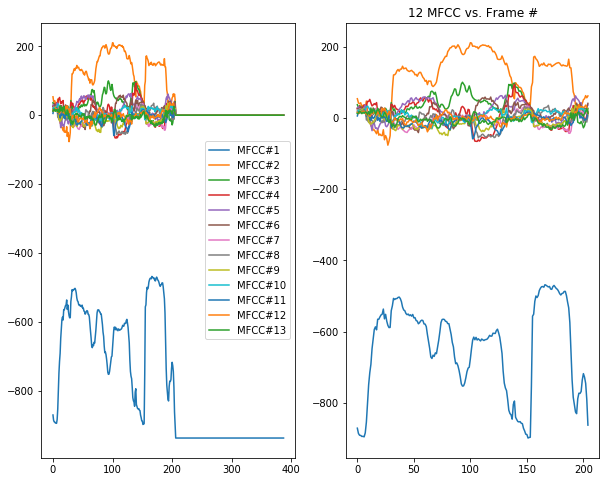

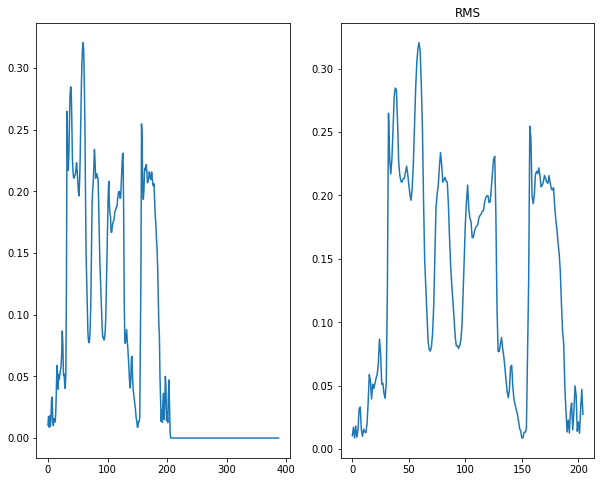

In [37]:
frame_t = 0.025 #25ms 
frame_n = round(sr*frame_t) 

hop_n = round(0.01*sr) #10ms 

tr_features = []; tr_labels  = []
test_features = []; test_labels = [] 

for sets in range(2): 
    if sets == 0:
        mydata = tr_w
        #print('Feature Extraction for Training Set', sets)
    if sets == 1:
        mydata = test_w
        #print('Feature Extraction for Test Set', sets)
    
    ind=0
    for wavs in range(len(mydata)): 
        ind+=1
        #print(ind,end=" ")
        y = mydata[wavs,:]   
 
        mfcc_num = 13 
        Ethresh = 0.01
        
        S, phase = librosa.magphase(librosa.stft(y=y,win_length=frame_n, hop_length=hop_n))
        rmst = (librosa.feature.rmse(S=S,frame_length=frame_n, hop_length=hop_n))
        
        Elocs = np.where(rmst>Ethresh)[1] #all places where greater than 0.05
        Eloc = np.arange(Elocs[0],Elocs[-1]+1) #only chop off ends, keep middle zeros for silence frames
        rms = rmst[:,Eloc]
        
#----------------------------------------------------------
        #MFCC per frame
        MFCCt = librosa.feature.mfcc(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n, n_mfcc=mfcc_num)
        MFCC = MFCCt[:, Eloc]
#         print('Shape of MFCC', MFCC.shape)

#----------------------------------------------------------
        _cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        cent = _cent[:,Eloc]
#----------------------------------------------------------

        _rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        rolloff = _rolloff[:,Eloc]
#---------------------------------------------------------

        zcrt = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_n, hop_length=hop_n)
        zcr = zcrt[:,Eloc]
#----------------------------------------------------------
 
        #Plot the sample features 
        if sets == 0 and wavs == 0:
            plt.figure(1, figsize=(10,8))
            for i in range(13):
                plt.subplot(121)
                plt.plot(MFCCt[i,:],label="MFCC#{}".format(i+1))
                plt.legend()
                plt.subplot(122)
                plt.plot(MFCC[i,:],label="MFCC#{}".format(i+1))
                plt.title('12 MFCC vs. Frame #')
                
                
            plt.figure(2, figsize=(10,8))
            plt.subplot(121)
            plt.plot(rmst[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rms[0,:],label='ZCR')
            plt.title('RMS')
            
            plt.figure(3, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_cent[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(cent[0,:],label='ZCR')
            plt.title('Centroid')
 
            plt.figure(4, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_rolloff[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rolloff[0,:],label='ZCR')
            plt.title('Rolloff')
 
        MFCC = np.mean(MFCC, axis=1)
        zcr = np.mean(zcr, axis =1)
        rms = np.mean(rms, axis =1)
        cent = np.mean(cent, axis =1)
        rolloff = np.mean(rolloff, axis=1)  
#-------------------------------------------------------

        MFCC = np.reshape(MFCC, (len(MFCC),1)) 
        zcr = np.reshape(zcr, (len(zcr),1)) 
        rms = np.reshape(rms, (len(rms),1)) 
        cent = np.reshape(cent, (len(cent),1)) 
        rolloff = np.reshape(rolloff, (len(rolloff),1))
        
#----------------------------------------------------------     

        concat = np.vstack((MFCC,zcr, rms, cent, rolloff))
        
        if sets == 0:
           tr_features.append(concat[:,0])   
           tr_labels.append(tr_l[wavs])
        if sets == 1: 
           test_features.append(concat[:,0])
           test_labels.append(test_l[wavs])

In [9]:
#pip install 'librosa==0.6.3'

In [38]:
tr_fea = np.array(tr_features); tr_lab = np.array(tr_labels)
print('Train -Audio x Features x Frames',tr_fea.shape)
print('Train -Labels of audio',(tr_lab.shape))  

test_fea = np.array(test_features); test_lab = np.array(test_labels)
print('Test -Audio x Features x Frames',test_fea.shape)
print('Test -Labels of audio',(test_lab.shape))  

#Normalize the training features: 
scaler = preprocessing.StandardScaler().fit(tr_fea)
tr_fea = scaler.transform(tr_fea) 

for i in range(tr_fea.shape[1]): 
    plt.figure(1, figsize=(10,8))
    plt.subplot(5,4,i+1)
    plt.scatter(np.arange(tr_fea.shape[0]),tr_fea[:,i],c=tr_lab);


Train -Audio x Features x Frames (3200, 17)
Train -Labels of audio (3200,)
Test -Audio x Features x Frames (800, 17)
Test -Labels of audio (800,)


# ONE vs ONE CLASSIFIER(RBF kernel)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
Training Score 0.9784375
Score 0.15875
Accuracy 0.15875
Confusion Matrix
 [[27 42 19 44  5 10 26 14]
 [ 0  0  0  0  0  0  0  0]
 [ 8 13  2  7  4  6  9  3]
 [ 2  1  0  1  0  1  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  4  4  2  0  8  3  7]
 [30 20 28 24 43 33 46 33]
 [33 20 46 22 48 42 16 43]]


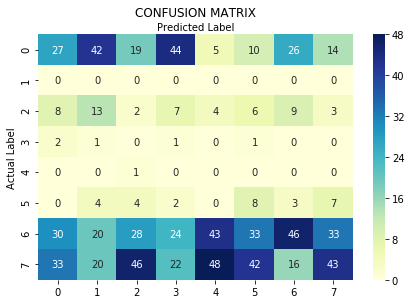

In [39]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
 
clf =  (OneVsOneClassifier(svm.SVC(kernel = 'rbf', gamma = 'auto',C=1,class_weight = 'balanced',tol = 1e-15, verbose = True))).fit(tr_fea, tr_lab)
print("")
print('Training Score',clf.score(tr_fea, tr_lab)) 

test_fea_transformed = scaler.transform(test_fea)
print('Score',clf.score(test_fea_transformed, test_lab)) 
  
test_lab_pred = clf.predict(test_fea_transformed)
acc = accuracy_score(test_lab_pred,test_lab)
print('Accuracy',acc)
#print(test_lab_pred)
#print(test_lab)
cm_svm = confusion_matrix(test_lab_pred, test_lab)

#cm_svm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

#print(confusion_matrix(test_lab_pred, test_lab))
print('Confusion Matrix\n', cm_svm) 
#plot_confusion_matrix(test_lab, test_lab_pred, classes=emotionclassname, normalize=True, title='Normalized confusion matrix')

#plt.savefig('norm4emo.png')

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cm_svm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# SVM One vs One (Linerar Kernel)

Training Score 0.908125
Test Score 0.1525
Accuracy 0.1525
Confusion Matrix
 [[32 38 14 37  7 16 18  9]
 [ 0  0  0  0  0  0  0  0]
 [26 36 21 31 21 35 27 41]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  1]
 [38 25 42 28 39 34 43 26]
 [ 4  0 23  4 32 13 12 23]]


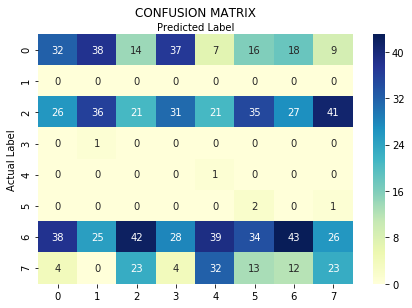

In [40]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
Eval_ovo = (SVC(kernel='linear', decision_function_shape='ovo'))
Eval_ovo.fit(tr_fea, tr_lab)
#Pred_ovo = Eval_ovo.predict(X_test)

#model.fit(tr_fea, tr_lab)

test_fea_transformed_ovo = scaler.transform(test_fea)
test_lab_pred_ovo = Eval_ovo.predict(test_fea_transformed_ovo)

from sklearn.metrics import accuracy_score
print('Training Score',Eval_ovo.score(tr_fea, tr_lab)) 
print('Test Score', Eval_ovo.score(test_fea_transformed_ovo, test_lab))
print('Accuracy', accuracy_score(test_lab_pred_ovo,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred_ovo, test_lab))

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred_ovo, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic Regression

Training Score 0.8678125
Test Score 0.14125
Accuracy 0.14125
Confusion Matrix
 [[25 36 11 25  7  9 22 10]
 [ 0  0  0  0  0  0  0  0]
 [28 44 16 40 14 24 27 34]
 [ 1  2  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1]
 [34 16 38 22 27 29 32 18]
 [12  2 35 12 52 35 19 37]]


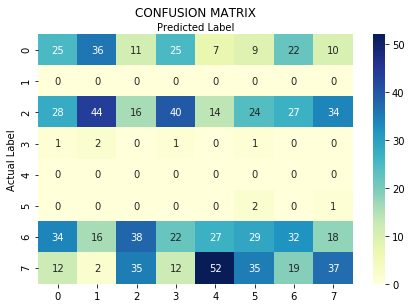

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(tr_fea, tr_lab)

test_fea_transformed = scaler.transform(test_fea)
test_lab_pred = logreg.predict(test_fea_transformed)

#y_pred = logreg.predict(test_fea_transformed)
from sklearn.metrics import accuracy_score
print('Training Score',logreg.score(tr_fea, tr_lab)) 
print('Test Score', logreg.score(test_fea_transformed, test_lab))
print('Accuracy', accuracy_score(test_lab_pred,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred, test_lab))

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(tr_fea, tr_lab)


test_fea_transformed_nb = scaler.transform(test_fea)
test_lab_pred_nb = gnb.predict(test_fea_transformed_nb)

from sklearn.metrics import accuracy_score
print('Training Score',gnb.score(tr_fea, tr_lab)) 
print('Test Score', gnb.score(test_fea_transformed_nb, test_lab))
print('Accuracy', accuracy_score(test_lab_pred_nb,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred_nb, test_lab))
# y_pred_test = gnb.predict(x_test)
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(y_test,y_pred_test)

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred_nb, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Training Score 0.7028125
Test Score 0.14233278955954323
Accuracy 0.14233278955954323
Confusion Matrix
 [[ 54 132  71  92  40  65  65  34]
 [  0   0   0   0   0   0   0   0]
 [100 184 228 224 275 209  88 111]
 [  4  16   0   9   0   3   2   1]
 [  8  16   9   9  14  23   3  12]
 [  3   9  18  11  22  15  10  13]
 [  1   1   3   5   8  13  10   2]
 [ 18  18  47  26  17  48  14  19]]


# Decision Tree

Training Score 1.0
Test Score 0.14274061990212072
Accuracy 0.14274061990212072
Confusion Matrix
 [[ 20  55  21  47  28  22  27  22]
 [  0   0   0   0   0   0   0   0]
 [ 15  54  60  48  55  79  24  27]
 [ 35  82  42  76  34  49  37  27]
 [  6  13  45  15  44  33  10   3]
 [ 30  35  46  46  66  47  23  32]
 [  9  31  41  37  59  30  52  30]
 [ 73 106 121 107  90 116  19  51]]


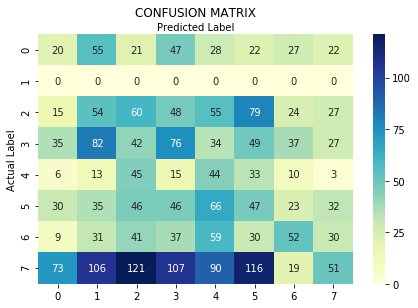

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(tr_fea, tr_lab)

test_fea_transformed_dt = scaler.transform(test_fea)
test_lab_pred_dt = dt.predict(test_fea_transformed_dt)

from sklearn.metrics import accuracy_score
print('Training Score',dt.score(tr_fea, tr_lab)) 
print('Test Score', dt.score(test_fea_transformed_dt, test_lab))
print('Accuracy', accuracy_score(test_lab_pred_dt,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred_dt, test_lab))
# y_pred2 = dt.predict(x_test)
# acc2 = accuracy_score(y_test,y_pred2)

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred_dt, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# KNN

Training Score 0.9746875
Test Score 0.149673735725938
Accuracy 0.149673735725938
Confusion Matrix
 [[ 42 106  46  74  17  25  49  23]
 [  0   0   0   0   0   0   0   0]
 [ 27  65  92  55  91  61  33  38]
 [  5  14   1   8   2  12   3   2]
 [ 16  24  62  24  53  35   0   2]
 [ 12  21  64  41  85  60   5  15]
 [ 50  88  28  93  58  89  78  78]
 [ 36  58  83  81  70  94  24  34]]


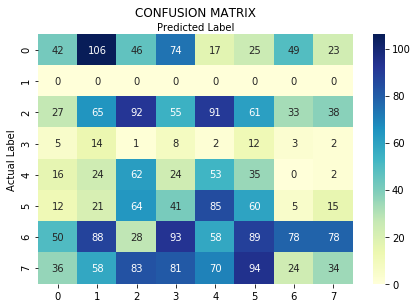

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')
clf.fit(tr_fea, tr_lab)

test_fea_transformed_knn = scaler.transform(test_fea)
test_lab_pred_knn = clf.predict(test_fea_transformed_knn)

from sklearn.metrics import accuracy_score
print('Training Score',clf.score(tr_fea, tr_lab)) 
print('Test Score', clf.score(test_fea_transformed_knn, test_lab))
print('Accuracy', accuracy_score(test_lab_pred_knn,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred_knn, test_lab))

# y_pred3 = clf.predict(x_test)
# acc3 =   accuracy_score(y_test,y_pred3)

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred_knn, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Random Forest

Training Score 1.0
Test Score 0.1468189233278956
Accuracy 0.1468189233278956
Confusion Matrix
 [[ 98 224  60 168  20  60  81  54]
 [  0   0   0   0   0   0   0   0]
 [  6  13  27  21  64  33  13  14]
 [  8  16   2   9   0   9   6   3]
 [  0   2  33   9  34  21   0   5]
 [ 29  54  94  65  99  94  16  36]
 [ 14  20  55  33  56  46  56  38]
 [ 33  47 105  71 103 113  20  42]]


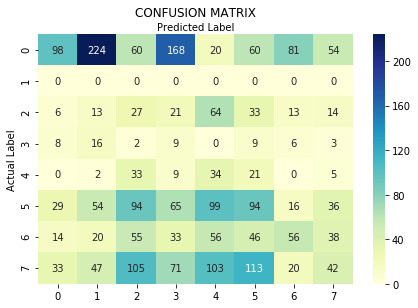

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(tr_fea, tr_lab)

test_fea_transformed_rf = scaler.transform(test_fea)
test_lab_pred_rf = model.predict(test_fea_transformed_rf)

from sklearn.metrics import accuracy_score
print('Training Score',model.score(tr_fea, tr_lab)) 
print('Test Score', model.score(test_fea_transformed_rf, test_lab))
print('Accuracy', accuracy_score(test_lab_pred_rf,test_lab))
print('Confusion Matrix\n', confusion_matrix(test_lab_pred_rf, test_lab))

import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(test_lab_pred_rf, test_lab)), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()